In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("Mobile Device Data for Assignment 2.xlsx")
data = data.drop(['Model ID', 'Model',"Release Date","Release Year"], axis=1)

In [ ]:
from matplotlib import pyplot as plt

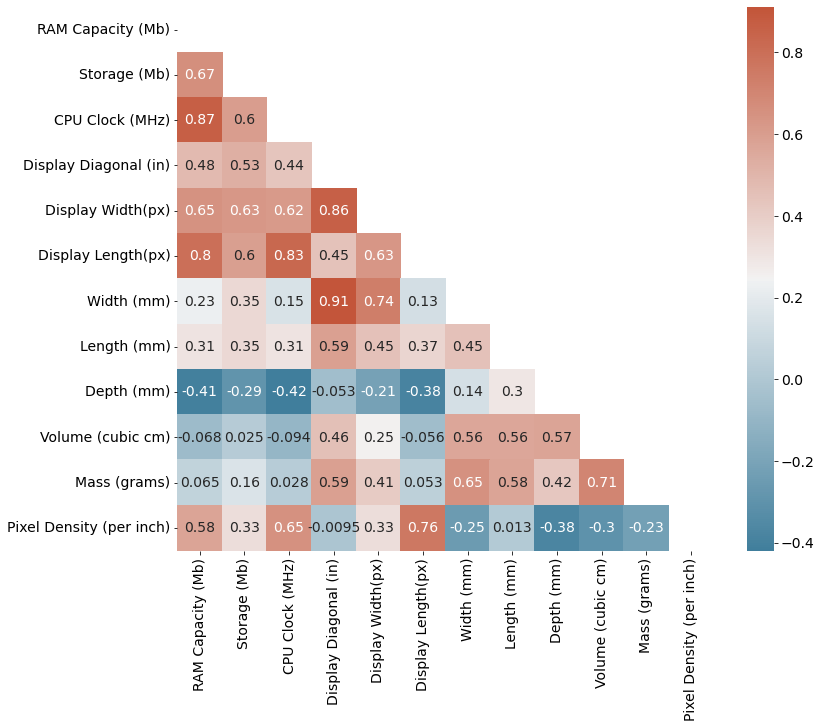

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
%%capture
!pip install shap

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

## Inspect the original dataset

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS

embedding = MDS(n_components=3)
data_transformed = embedding.fit_transform(data)

In [ ]:
print("Data shape before ",data.shape)
print("Data shape after MDS ", data_transformed.shape)

Data shape before  (3162, 12)
Data shape after MDS  (3162, 3)


In [ ]:
data_transformed = pd.DataFrame(data_transformed, columns = ['MD1','MD2','MD3'])
print(data_transformed)

           MD1       MD2       MD3
0     0.536126 -0.020920 -0.373447
1     0.555589 -0.053157 -0.217248
2     0.553203 -0.057988 -0.241451
3     0.555526 -0.053235 -0.217207
4     0.514150 -0.094836 -0.160323
...        ...       ...       ...
3157 -0.990374 -0.364094  0.368996
3158 -0.998160 -0.448255  0.455236
3159 -0.318565 -0.029901  0.105065
3160 -0.632664  0.035018  0.296759
3161 -0.154230 -0.028530  0.178769

[3162 rows x 3 columns]


## Knn algorithm

In [ ]:
#set.seed(23)
model = KMeans(n_clusters=4)
model.fit(data)
all_predictions = model.predict(data)


In [ ]:
print(all_predictions)
print(len(all_predictions))

[0 0 0 ... 3 1 3]
3162


In [ ]:
data['labels'] = all_predictions

In [ ]:
feature_list = []
for i in range(13):
  feature_list.append(data.columns[i])

In [ ]:
feature_list.remove("labels")


In [ ]:

y = data['labels']
X = data.drop(["labels"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.feature_importances_

array([0.15549717, 0.04567605, 0.13340762, 0.07190627, 0.08888902,
       0.18884812, 0.06202711, 0.025824  , 0.02953588, 0.03003439,
       0.04091617, 0.12743818])

In [ ]:
#feature_list.remove("labels")
print(feature_list)


['RAM Capacity (Mb)', 'Storage (Mb)', 'CPU Clock (MHz)', 'Display Diagonal (in)', 'Display Width(px)', 'Display Length(px)', 'Width (mm)', 'Length (mm)', 'Depth (mm)', 'Volume (cubic cm)', 'Mass (grams)', 'Pixel Density (per inch)']


## The sharp value denote the importance of the features

<BarContainer object of 12 artists>

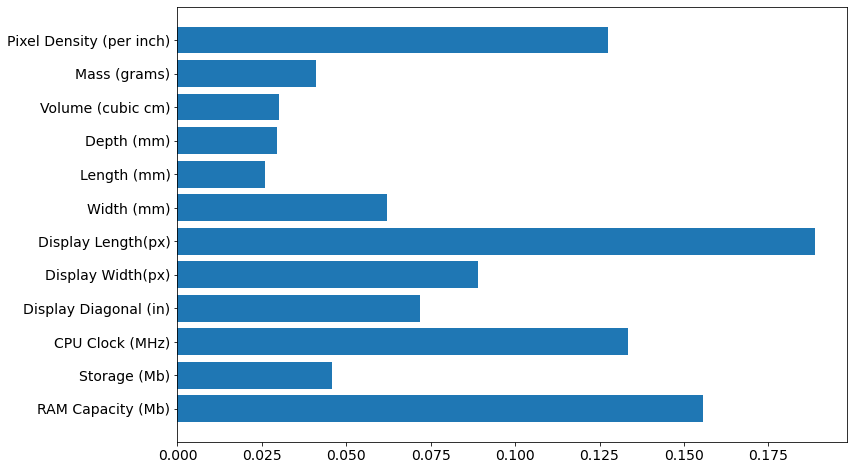

In [ ]:
plt.barh(feature_list, rf.feature_importances_)

In [ ]:
new_data = data[["RAM Capacity (Mb)","CPU Clock (MHz)","Pixel Density (per inch)","Display Length(px)","labels"]]
print(new_data)
print(type(new_data))

      RAM Capacity (Mb)  CPU Clock (MHz)  Pixel Density (per inch)  \
0              0.000000         0.000000                  0.000000   
1              0.000214         0.002230                  0.030793   
2              0.000092         0.001895                  0.035336   
3              0.000458         0.002230                  0.030793   
4              0.000214         0.003386                  0.129985   
...                 ...              ...                       ...   
3157           1.000000         0.749886                  0.751641   
3158           1.000000         0.749886                  0.751641   
3159           0.249977         0.599818                  0.480061   
3160           0.499985         0.599818                  0.713781   
3161           0.249977         0.499772                  0.358910   

      Display Length(px)  labels  
0               0.000000       0  
1               0.047619       0  
2               0.023810       0  
3               0.0

In [ ]:
df_long = pd.melt(new_data, "labels", var_name="a", value_name="c")

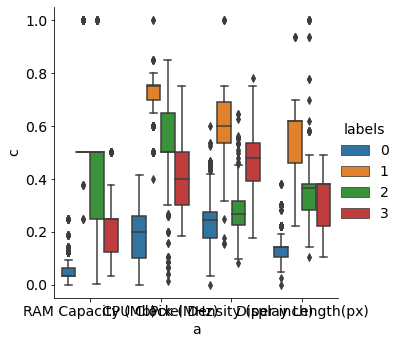

In [ ]:
sns.factorplot("a", hue="labels", y="c", data=df_long, kind="box")


Using the boxplot function without specifying `order` is likely to produce an incorrect plot.


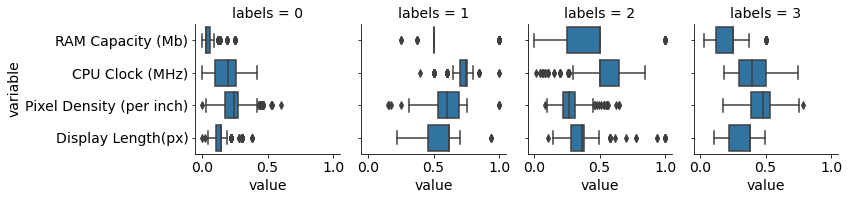

In [ ]:
g = sns.FacetGrid(pd.melt(new_data, id_vars='labels'), col='labels')
g.map(sns.boxplot, 'value', 'variable')


## New_dataset

In [ ]:
data

# Xi-3
# Xiaoxiong-2
# Suchi-1
# # Meng-0
grouped_means = data.groupby('labels').mean()

#grouped.boxplot(rot=45, fontsize=12, figsize=(8,10))

In [ ]:
grouped_means

,RAM Capacity (Mb),Storage (Mb),CPU Clock (MHz),Display Diagonal (in),Display Width(px),Display Length(px),Width (mm),Length (mm),Depth (mm),Volume (cubic cm),Mass (grams),Pixel Density (per inch)
labels,,,,,,,,,,,,
0,0.046564,0.005310,0.178968,0.117105,0.084479,0.139022,0.198506,0.276752,0.088843,0.036453,0.032474,0.235685
1,0.204597,0.049351,0.415978,0.140457,0.143908,0.323856,0.156898,0.287405,0.048057,0.014480,0.019947,0.468936
2,0.403918,0.306623,0.537994,0.510072,0.407018,0.376178,0.591074,0.514509,0.054492,0.103973,0.119317,0.292856
3,0.586649,0.281208,0.709388,0.205898,0.226538,0.532507,0.171136,0.342723,0.024585,0.010820,0.018944,0.597009


In [ ]:
data

array([[ 0.72729918,  1.23254886, -0.18569239, -0.40959134],
       [-1.55363896, -1.86196528, -0.64871117,  0.03747315],
       [ 0.33452202, -0.76431914,  0.05565783,  1.54871502],
       ...,
       [ 1.11249883, -1.49197569,  1.40534294, -0.68365695],
       [-0.4054468 ,  1.24439058,  0.18962793,  0.78990813],
       [ 0.15333376,  0.15909743, -0.76069931, -0.56746321]])

In [ ]:
group_variance= data.groupby('labels').var()

In [ ]:
group_variance

,RAM Capacity (Mb),Storage (Mb),CPU Clock (MHz),Display Diagonal (in),Display Width(px),Display Length(px),Width (mm),Length (mm),Depth (mm),Volume (cubic cm),Mass (grams),Pixel Density (per inch)
labels,,,,,,,,,,,,
0,0.038993,0.051760,0.008286,0.001186,0.003220,0.012530,0.000475,0.001672,0.000118,0.000104,0.000055,0.015100
1,0.001645,0.000283,0.007974,0.006213,0.003076,0.001795,0.010830,0.012638,0.003784,0.003531,0.002585,0.005803
2,0.010191,0.007000,0.013560,0.002188,0.001640,0.006573,0.001654,0.004556,0.001118,0.000471,0.000300,0.011432
3,0.050436,0.082939,0.028464,0.011675,0.015608,0.024028,0.017186,0.025533,0.006890,0.010370,0.006908,0.011222


In [ ]:
sns.factorplot("a", hue="b", y="c", data=df_long, kind="box")


In [ ]:
df

## Visualize In 3D dimensions

In [ ]:
data_transformed['labels'] = all_predictions

In [ ]:
import plotly.express as px
fig = px.scatter_3d(data_transformed, x='MD1', y='MD2', z='MD3',
              color='labels')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(data_transformed, x='MD1', y='MD2', z='MD3')
fig.show()